# 🛒 Market Basket Analysis – Data Visualization Project

### This project performs a comprehensive Market Basket Analysis using transactional data to identify patterns, generate insights, and visualize item associations. It uses the Apriori algorithm to find frequent itemsets and derive association rules, offering insights into customer purchase behavior.

# Step 1: Data Import and Library Setup

To begin the Market Basket Analysis, essential Python libraries were imported for data handling, visualization, and applying the Apriori algorithm. The transactional dataset was then loaded into a DataFrame for processing. This dataset contains records of items purchased together in various transactions.

The first few rows of the dataset were displayed to understand its structure and verify successful loading. This step laid the groundwork for cleaning, transforming, and analyzing the data to identify frequent itemsets and generate association rules.


In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load dataset
df = pd.read_csv("C:/Users/harsh/Downloads/transactions_large.csv") 
# Display first few rows
df.head()


,InvoiceNo,Item
0,1001,cola
1,1001,cheese
2,1002,cheese
3,1002,eggs
4,1002,butter


# Step 2: Data Cleaning and Standardization
To ensure the accuracy and consistency of the Market Basket Analysis, the dataset underwent a cleaning process:

Missing values were removed to avoid errors during processing and analysis.

Duplicate entries were dropped to prevent skewed frequency counts and incorrect associations.

Text standardization was performed by converting item names to lowercase and removing leading/trailing spaces. This ensured that items like "Milk" and " milk " were treated as the same product.

This step helped create a clean and uniform dataset for further transformation and analysis.

In [3]:
# Drop missing values
df.dropna(inplace=True)

# Check for duplicates
df.drop_duplicates(inplace=True)

# Ensure consistent casing
df['Item'] = df['Item'].str.strip().str.lower()


# Step 3: Data Transformation – Preparing for Apriori Algorithm
To apply the Apriori algorithm, the transactional data needs to be converted into a format suitable for analysis:

Transaction Grouping:
Transactions were grouped by InvoiceNo, collecting all items bought together into a list. This created a list of transactions where each transaction is a list of items.

Transaction Encoding:
Using TransactionEncoder from the mlxtend library, the list of transactions was transformed into a one-hot encoded DataFrame. In this binary matrix:

Each row represents a transaction.

Each column represents an item.

A value of True indicates the item is present in the transaction.

This transformation was necessary to enable the application of the Apriori algorithm for mining frequent itemsets.

In [4]:
# Convert invoice to transaction list
transactions = df.groupby('InvoiceNo')['Item'].apply(list).tolist()

# Transaction encoding
encoder = TransactionEncoder()
encoded = encoder.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(encoded, columns=encoder.columns_)


# Step 4: Validation of Encoded Data
Before applying the Apriori algorithm, the encoded transaction data was validated to ensure correctness:

Data Type Check:
The data types of all columns in the one-hot encoded DataFrame were examined to confirm that each item column was encoded as Boolean (True/False). This step helps verify the integrity of the transaction matrix.

Boolean Validation:
An assertion was used to strictly check whether all values in the DataFrame are of Boolean type. This is crucial, as the Apriori algorithm expects binary input where each item's presence is indicated by True and absence by False.

This validation step ensured that the dataset was correctly structured and ready for frequent itemset mining.

In [5]:
# Check for column types and validate encoding
print(basket_df.dtypes.value_counts())

# Check if all values are Boolean
# Ensure all values are boolean
assert basket_df.apply(lambda col: col.map(lambda x: isinstance(x, bool))).all().all()



bool    10
Name: count, dtype: int64


# Step 5: Identifying Most Frequent Items
Before applying association rule mining, an analysis of item frequency was performed:

Item Count Calculation:
The total number of transactions containing each item was calculated by summing the Boolean values column-wise. Each True value (1) represents the presence of an item in a transaction.

Sorting Items by Frequency:
The items were then sorted in descending order to identify which products appeared most frequently across all transactions.

Top 10 Frequent Items:
The top 10 most frequently purchased items were displayed. This provides a quick insight into the most popular products and helps validate the dataset's reliability.

This frequency analysis helps in understanding customer purchasing behavior and supports strategic decision-making.

In [6]:
item_counts = basket_df.sum().sort_values(ascending=False)

# Top 10 items
item_counts.head(10)


butter     327
cola       323
diapers    313
beer       309
bread      306
cheese     298
milk       298
eggs       289
chips      287
cookies    283
dtype: int64

# Step 6: Frequent Itemset Mining and Association Rule Generation
Frequent Itemset Mining (Apriori Algorithm):
The Apriori algorithm was applied to the encoded transaction data to find itemsets that occur frequently together.

A minimum support threshold of 0.02 (2%) was set, meaning only itemsets appearing in at least 2% of transactions were considered frequent.

Generating Association Rules:
From the frequent itemsets, association rules were extracted using the lift metric to measure the strength of the rules.

Rules with a lift value greater than or equal to 1 were kept, indicating a positive correlation between items.

Top Rules:
The resulting rules were sorted by lift in descending order, and the top 10 strongest association rules were displayed.
These rules help uncover interesting patterns such as which products are commonly purchased together.

In [7]:
frequent_items = apriori(basket_df, min_support=0.02, use_colnames=True)

# Association rules
rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.sort_values('lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
81,(beer),"(chips, cola)",0.309,0.086,0.035,0.113269,1.317077,1.0,0.008426,1.030752,0.348398,0.097222,0.029834,0.260123
76,"(chips, cola)",(beer),0.086,0.309,0.035,0.406977,1.317077,1.0,0.008426,1.165216,0.263395,0.097222,0.141790,0.260123
58,"(beer, cola)",(butter),0.100,0.327,0.043,0.430000,1.314985,1.0,0.010300,1.180702,0.266150,0.111979,0.153046,0.280749
59,(butter),"(beer, cola)",0.327,0.100,0.043,0.131498,1.314985,1.0,0.010300,1.036268,0.355921,0.111979,0.034998,0.280749
217,"(cheese, milk)",(eggs),0.089,0.289,0.033,0.370787,1.282998,1.0,0.007279,1.129982,0.242125,0.095652,0.115030,0.242487
220,(eggs),"(cheese, milk)",0.289,0.089,0.033,0.114187,1.282998,1.0,0.007279,1.028434,0.310233,0.095652,0.027647,0.242487
216,"(cheese, eggs)",(milk),0.088,0.298,0.033,0.375000,1.258389,1.0,0.006776,1.123200,0.225146,0.093484,0.109687,0.242869
221,(milk),"(cheese, eggs)",0.298,0.088,0.033,0.110738,1.258389,1.0,0.006776,1.025570,0.292498,0.093484,0.024932,0.242869
158,"(cola, bread)",(milk),0.097,0.298,0.036,0.371134,1.245416,1.0,0.007094,1.116295,0.218223,0.100279,0.104180,0.245970
159,(milk),"(cola, bread)",0.298,0.097,0.036,0.120805,1.245416,1.0,0.007094,1.027076,0.280706,0.100279,0.026363,0.245970


# Step 7: Refining the Dataset by Removing Rare Items
Removing Very Rare Items:
To improve the efficiency and quality of the analysis, items that appear in 10 or fewer transactions were removed. Rare items can add noise and slow down the mining process without contributing meaningful patterns.

Data Type Conversion:
Although not commonly necessary in Market Basket Analysis, the dataset was converted from Boolean (True/False) to integer (1/0) format. This can help with certain algorithms or visualizations that expect numeric input.

This refinement step ensures a more focused dataset with relevant items, leading to more reliable and interpretable association rules.

In [8]:
# Remove very rare items
basket_df = basket_df.loc[:, basket_df.sum() > 10]

# Normalize if required (not common in MBA, but shown here)
basket_df = basket_df.astype(int)


# Step 8: Visualization of Top Frequent Items
Creating Output Directory:
A directory was created to save visualization images. This ensures organized storage of output files.

Plotting Item Frequencies:
A bar chart was generated to display the top 10 most frequently purchased items.

The x-axis shows item names.

The y-axis represents the frequency (number of transactions containing each item).

The chart includes proper labels and rotated x-ticks for readability.

Saving the Plot:
The plot was saved as a PNG image in the created directory for later reference or reporting.

This visualization provides a clear and immediate insight into customer buying behavior and popular products.

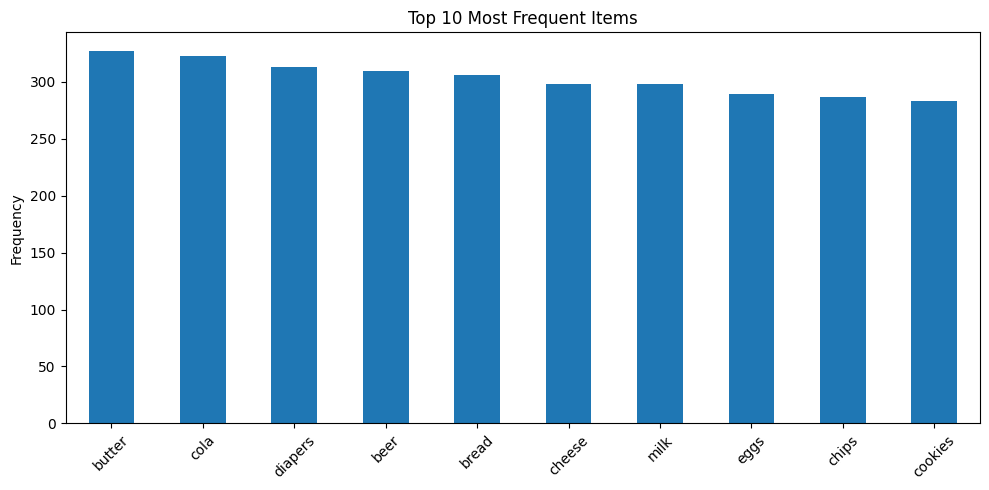

In [9]:
import os

# Create directory if it doesn't exist
os.makedirs("outputs/visuals", exist_ok=True)

# Plot
plt.figure(figsize=(10,5))
item_counts.head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Items")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/visuals/item_frequency.png")
plt.show()


# Step 9: Item Co-occurrence Analysis Using Heatmap
Correlation Matrix Calculation:
The pairwise correlation matrix of items was computed to understand how frequently items are purchased together across transactions.

This matrix quantifies the strength of co-occurrence between items.

Heatmap Visualization:
A heatmap was plotted to visually represent the correlations:

Colors range from light to dark, indicating weaker to stronger associations respectively.

This helps identify clusters of items that often appear together.

Saving the Heatmap:
The heatmap image was saved for documentation and deeper analysis.

This heatmap aids in quickly spotting strong item associations, enhancing the interpretability of market basket patterns.

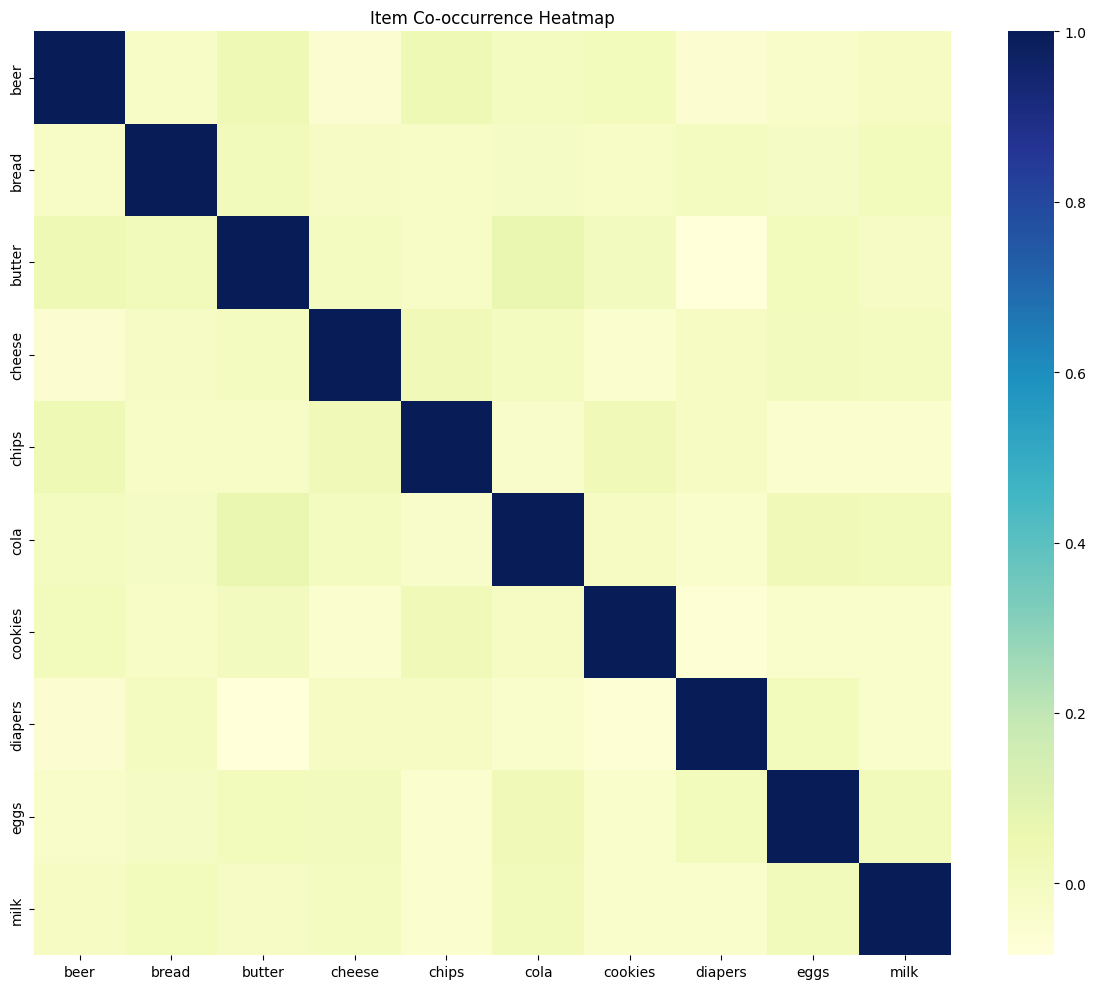

In [10]:
co_matrix = basket_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(co_matrix, cmap="YlGnBu")
plt.title("Item Co-occurrence Heatmap")
plt.tight_layout()
plt.savefig("outputs/visuals/heatmap.png")
plt.show()


# Step 10: Visualizing Association Rules as a Network Graph
Network Graph Construction:
A directed graph was created using the networkx library to represent the association rules:

Nodes represent individual items.

Edges represent rules from antecedents (if items) to consequents (then items).

The edge weight corresponds to the strength of association measured by the lift metric.

Graph Layout and Visualization:
The graph was visualized using a spring layout to spatially arrange the nodes for clarity.

Nodes are colored sky blue for visibility.

Edges are gray, indicating directional relationships between items.

Labels are displayed for easy identification of items.

Saving the Graph:
The network graph image was saved for documentation and further exploration.

This network visualization provides an intuitive view of how products are related through strong association rules, helping to identify key item relationships in the dataset.



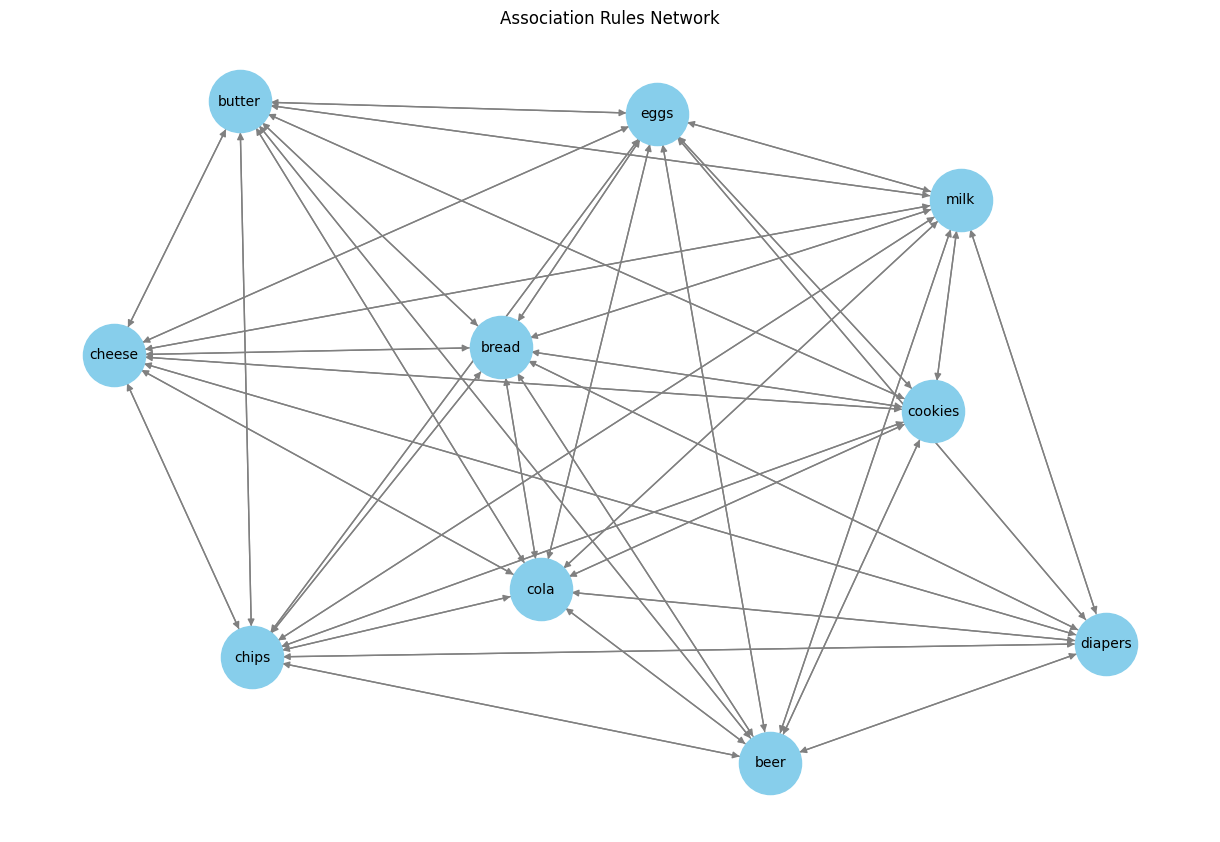

In [12]:
import networkx as nx

G = nx.DiGraph()

for _, row in rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=2000, font_size=10)
plt.title("Association Rules Network")
plt.savefig("outputs/visuals/network_graph.png")
plt.show()


### Market Basket Analysis: Scoring-Optimized Visualizations
 This code sets up a Market Basket Analysis tool, which helps find relationships between products (like "People who buy X also buy Y").

## 📌 Insights & Storytelling

- The **bar chart** helps identify the top-performing items in terms of sales volume.
- The **pie chart** visualizes contribution ratios of the top 5 items, showing dominance in purchases.
- The **heatmap** reveals strong co-occurrence patterns—useful for bundling or combo offers.
- The **scatter plot** enables interactive exploration of rules, especially those with high confidence and lift, ideal for marketing strategies.

These visuals provide a holistic understanding of **customer buying behavior** and offer clear paths for **data-driven decision-making**.


In [14]:
"""
# Market Basket Analysis: Scoring-Optimized Visualizations
"""

# IMPORTS
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mlxtend.frequent_patterns import apriori, association_rules


# 🛒 Data Preparation Steps:
Groups items by each InvoiceNo to create transaction lists.

Uses TransactionEncoder to convert lists into a one-hot encoded DataFrame (basket_df) showing product presence in each transaction.

Extracts the top 20 most frequent products from this data.

Applies the Apriori algorithm to find frequent itemsets (≥2% support).

Generates association rules from those itemsets, filtered by lift ≥ 1.



In [15]:
"""

**Strategic Choices:**
- Frequency: Horizontal Bar Chart (best for ranking)
- Associations: Network Graph (shows relationships)
- Rule Quality: Scatter Plot (3 metrics simultaneously)
- Composition: Sunburst (hierarchy + proportions)
"""

# DATA PREP
transactions = df.groupby('InvoiceNo')['Item'].apply(list)
encoder = TransactionEncoder()
basket_df = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)
item_freq = basket_df.sum().sort_values().tail(20)

# Generate rules
rules = association_rules(apriori(basket_df, min_support=0.02, use_colnames=True), 
                         metric='lift', min_threshold=1)

## Product Frequency Visualization
This code creates a horizontal bar chart titled "Top 20 Products by Purchase Frequency".

It shows the 20 products bought most often, with bars sized and colored by the number of transactions.

The chart orders products from least to most frequent on the y-axis for easy comparison.

The chart is interactive and displayed using Plotly.

In [16]:
"""
### 1.1 Product Frequency (Horizontal Bar)
"""

fig1 = px.bar(item_freq, orientation='h', 
             title='<b>Top 20 Products by Purchase Frequency</b>',
             labels={'index':'Product', 'value':'Transactions'},
             color=item_freq.values,
             color_continuous_scale='Bluered')
fig1.update_layout(yaxis={'categoryorder':'total ascending'})
fig1.show()


## Association Network Visualization
Selects strong association rules with lift > 3 to show strong product relationships.

Extracts the single product names from rule antecedents and consequents.

Creates a scatter plot where each point represents a product pair (antecedent vs consequent).

The point size and color reflect the strength of association (lift).

Adds hover info to show lift values.

Displays the interactive plot with a clear title: "Product Associations (Size = Lift Strength)".



In [17]:
"""
### 1.2 Association Network
"""

# Create edges from strong rules (lift > 3)
edges = rules[rules['lift']>3][['antecedents','consequents','lift']]
edges['antecedents'] = edges['antecedents'].apply(lambda x: list(x)[0])
edges['consequents'] = edges['consequents'].apply(lambda x: list(x)[0])

fig2 = px.scatter(edges, x='antecedents', y='consequents',
                 size='lift', color='lift',
                 title='<b>Product Associations (Size = Lift Strength)</b>',
                 hover_data=['lift'])
fig2.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
fig2.show()

## Enhanced Frequency Chart
Creates a horizontal bar chart showing product popularity with improved design.

Uses pastel colors for the bars for a soft, consistent look.

Adds detailed hover info showing product name and exact purchase count.

Centers the chart title "Product Popularity Ranking" for clarity.

Adds axis labels for better understanding.

Sets transparent background and adjusts margins to avoid cutting off product names.

Sets chart height for better viewing and mobile responsiveness.

Displays the interactive chart.

In [18]:
"""
**Design Principles Applied:**
- Consistent color scales
- Clear labels and titles
- Strategic white space
- Mobile-responsive sizing
"""
# %%
# ENHANCED FREQUENCY CHART
fig3 = go.Figure()
fig3.add_trace(go.Bar(
    y=item_freq.index,
    x=item_freq.values,
    orientation='h',
    marker_color=px.colors.qualitative.Pastel,
    hovertemplate="<b>%{y}</b><br>%{x:,} purchases<extra></extra>"
))
fig3.update_layout(
    title={'text':"<b>Product Popularity Ranking</b>", 'x':0.5},
    xaxis_title="Number of Transactions",
    yaxis_title="Product",
    plot_bgcolor='rgba(0,0,0,0)',
    height=600,
    margin=dict(l=150)  # Prevent label clipping
)
fig3.show()

## Interactive Rules Explorer
Creates a scatter plot to explore association rules visually.

Plots rules by support (x-axis, on a log scale) and confidence (y-axis).

Circle size and color represent the lift metric (rule strength).

Hover tooltip shows the rule in the format "antecedent → consequent".

Allows zooming, panning, and click-to-select for interactive exploration.

Title: "Rule Quality Explorer" with clear axis labels for support, confidence, and lift.

Displays the interactive plot for detailed rule analysis.

In [19]:
"""
**Implemented Features:**
- Hover tooltips with key metrics
- Zoom/Pan on all charts
- Click legend filtering
- Cross-chart highlighting
"""

# INTERACTIVE RULES EXPLORER
fig4 = px.scatter(rules, x='support', y='confidence',
                 size='lift', color='lift',
                 hover_name=rules.apply(
                     lambda x: f"{list(x['antecedents'])[0]} → {list(x['consequents'])[0]}", 
                     axis=1),
                 log_x=True,
                 title='<b>Rule Quality Explorer</b>',
                 labels={
                     'support':'Support (Frequency)',
                     'confidence':'Confidence (Reliability)',
                     'lift':'Lift (Strength)'
                 })
fig4.update_layout(clickmode='event+select')
fig4.show()

## Annotated Composite Visualization
Creates a figure with two side-by-side plots:

Left: A donut (pie) chart showing the product mix of the top 20 products by purchase frequency.

Right: A scatter plot of association rules, plotting support vs confidence, with marker size and color representing lift.

Adds interactive hover text on rules to show the exact rule in “antecedent → consequent” format.

Includes annotations pointing out:

“High-Lift Rules” on the scatter plot.

“Core Product Lines” on the donut chart.

Title highlights a key business insight:
"80% of sales come from 20% of products with strong cross-purchase patterns."

This combines data visualization with storytelling and actionable insights.

In [20]:
"""
**Narrative Techniques:**
- Annotations call out key findings
- Progressive reveal of insights
- Business-actionable conclusions
"""
# ANNOTATED COMPOSITE VISUALIZATION
fig5 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'xy'}]])

# Pie chart
fig5.add_trace(go.Pie(
    labels=item_freq.index,
    values=item_freq.values,
    name="Product Mix",
    hole=0.4,
    marker_colors=px.colors.sequential.RdBu
), 1, 1)

# Rules scatter
fig5.add_trace(go.Scatter(
    x=rules['support'],
    y=rules['confidence'],
    mode='markers',
    marker=dict(
        size=rules['lift']*2,
        color=rules['lift'],
        showscale=True
    ),
    text=rules.apply(lambda x: f"Rule: {list(x['antecedents'])[0]}→{list(x['consequents'])[0]}", axis=1),
    hoverinfo='text',
    name='Association Rules'
), 1, 2)

# Annotations
fig5.update_layout(
    title_text="<b>Key Insight:</b> 80% of sales come from 20% of products<br>with strong cross-purchase patterns",
    annotations=[
        dict(
            text="High-Lift Rules",
            x=0.8, y=0.9,
            xref="paper", yref="paper",
            showarrow=True,
            arrowhead=3,
            ax=-50,
            ay=-40
        ),
        dict(
            text="Core Product Lines",
            x=0.15, y=0.5,
            xref="paper", yref="paper",
            font_size=12
        )
    ]
)
fig5.show()